In [135]:
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import keras
import glob
from skimage import io

In [136]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# looking at few images


PNG
(100, 94)
RGB


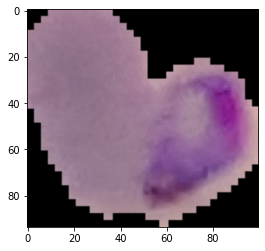

In [21]:
img = Image.open('gdrive/My Drive/CV_for_miscrophy/Image_classification/train200/Parasitized/C39P4thinF_original_IMG_20150622_105335_cell_6.png')
print(img.format)
print(img.size)
print(img.mode)
plt.imshow(img)

PNG
(121, 133)
RGB


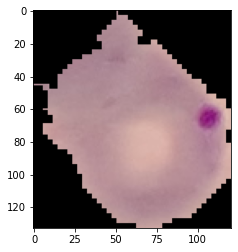

In [ ]:
img = Image.open('gdrive/My Drive/CV_for_miscrophy/Image_classification/train200/Parasitized/C39P4thinF_original_IMG_20150622_105335_cell_8.png')
print(img.format)
print(img.size)
print(img.mode)
plt.imshow(img)

PNG
(133, 136)
RGB


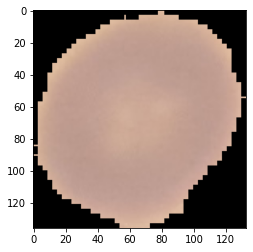

In [134]:
img = Image.open('gdrive/My Drive/CV_for_miscrophy/Image_classification/train200/Uninfected/C2NThinF_IMG_20150604_114751_cell_107.png')
print(img.format)
print(img.size)
print(img.mode)
plt.imshow(img)

In [ ]:
#images are at different sizes

In [137]:

SIZE = 64
dataset = []   
label = []  



In [139]:
#parazitized
path = 'gdrive/My Drive/CV_for_miscrophy/Image_classification/train200/Parasitized/*.png'
for file in glob.glob(path): 
  img = cv2.imread(file)
  image = Image.fromarray(img, 'RGB')
  image = image.resize((SIZE, SIZE))
  dataset.append(np.array(image))
  label.append(0)

  
  

In [140]:
#uninfected
path = 'gdrive/My Drive/CV_for_miscrophy/Image_classification/train200/Uninfected/*.png'
for file in glob.glob(path): 
  img = cv2.imread(file)
  image = Image.fromarray(img, 'RGB')
  image = image.resize((SIZE, SIZE))
  dataset.append(np.array(image))
  label.append(1)
  

In [145]:
dataset = np.array(dataset)
label = np.array(label)

In [141]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

In [142]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))  
model.compile(loss='binary_crossentropy',
              optimizer='adam',           
              metrics=['accuracy'])

print(model.summary()) 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
activation_25 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_26 (Activation)   (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 12, 12, 64)       

In [146]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

In [98]:
#from keras.utils import normalize
#X_train = normalize(X_train, axis=1)
#X_test = normalize(X_test, axis=1)

In [147]:
#Fit the model
history = model.fit(X_train, 
                         y_train, 
                         batch_size = 50, 
                         verbose = 1, 
                         epochs = 150,      
                         validation_split = 0.1,
                         shuffle = True
                      #   callbacks=callbacks
                     )

Epoch 1/150
5/5 [==============================] - 1s 72ms/step - loss: 42.7201 - accuracy: 0.5795 - val_loss: 11.2930 - val_accuracy: 0.3600
Epoch 2/150
5/5 [==============================] - 0s 13ms/step - loss: 10.7077 - accuracy: 0.5541 - val_loss: 2.2672 - val_accuracy: 0.6400
Epoch 3/150
5/5 [==============================] - 0s 12ms/step - loss: 2.2700 - accuracy: 0.6832 - val_loss: 1.0526 - val_accuracy: 0.6400
Epoch 4/150
5/5 [==============================] - 0s 13ms/step - loss: 1.3886 - accuracy: 0.6766 - val_loss: 0.6784 - val_accuracy: 0.6000
Epoch 5/150
5/5 [==============================] - 0s 13ms/step - loss: 0.8348 - accuracy: 0.5922 - val_loss: 0.5526 - val_accuracy: 0.8000
Epoch 6/150
5/5 [==============================] - 0s 13ms/step - loss: 0.5970 - accuracy: 0.6884 - val_loss: 0.5990 - val_accuracy: 0.6800
Epoch 7/150
5/5 [==============================] - 0s 13ms/step - loss: 0.5811 - accuracy: 0.6950 - val_loss: 0.5398 - val_accuracy: 0.6800
Epoch 8/150
5/5 [

2/2 [==============================] - 0s 37ms/step - loss: 0.3564 - accuracy: 0.9672
Test_Accuracy: 96.72%


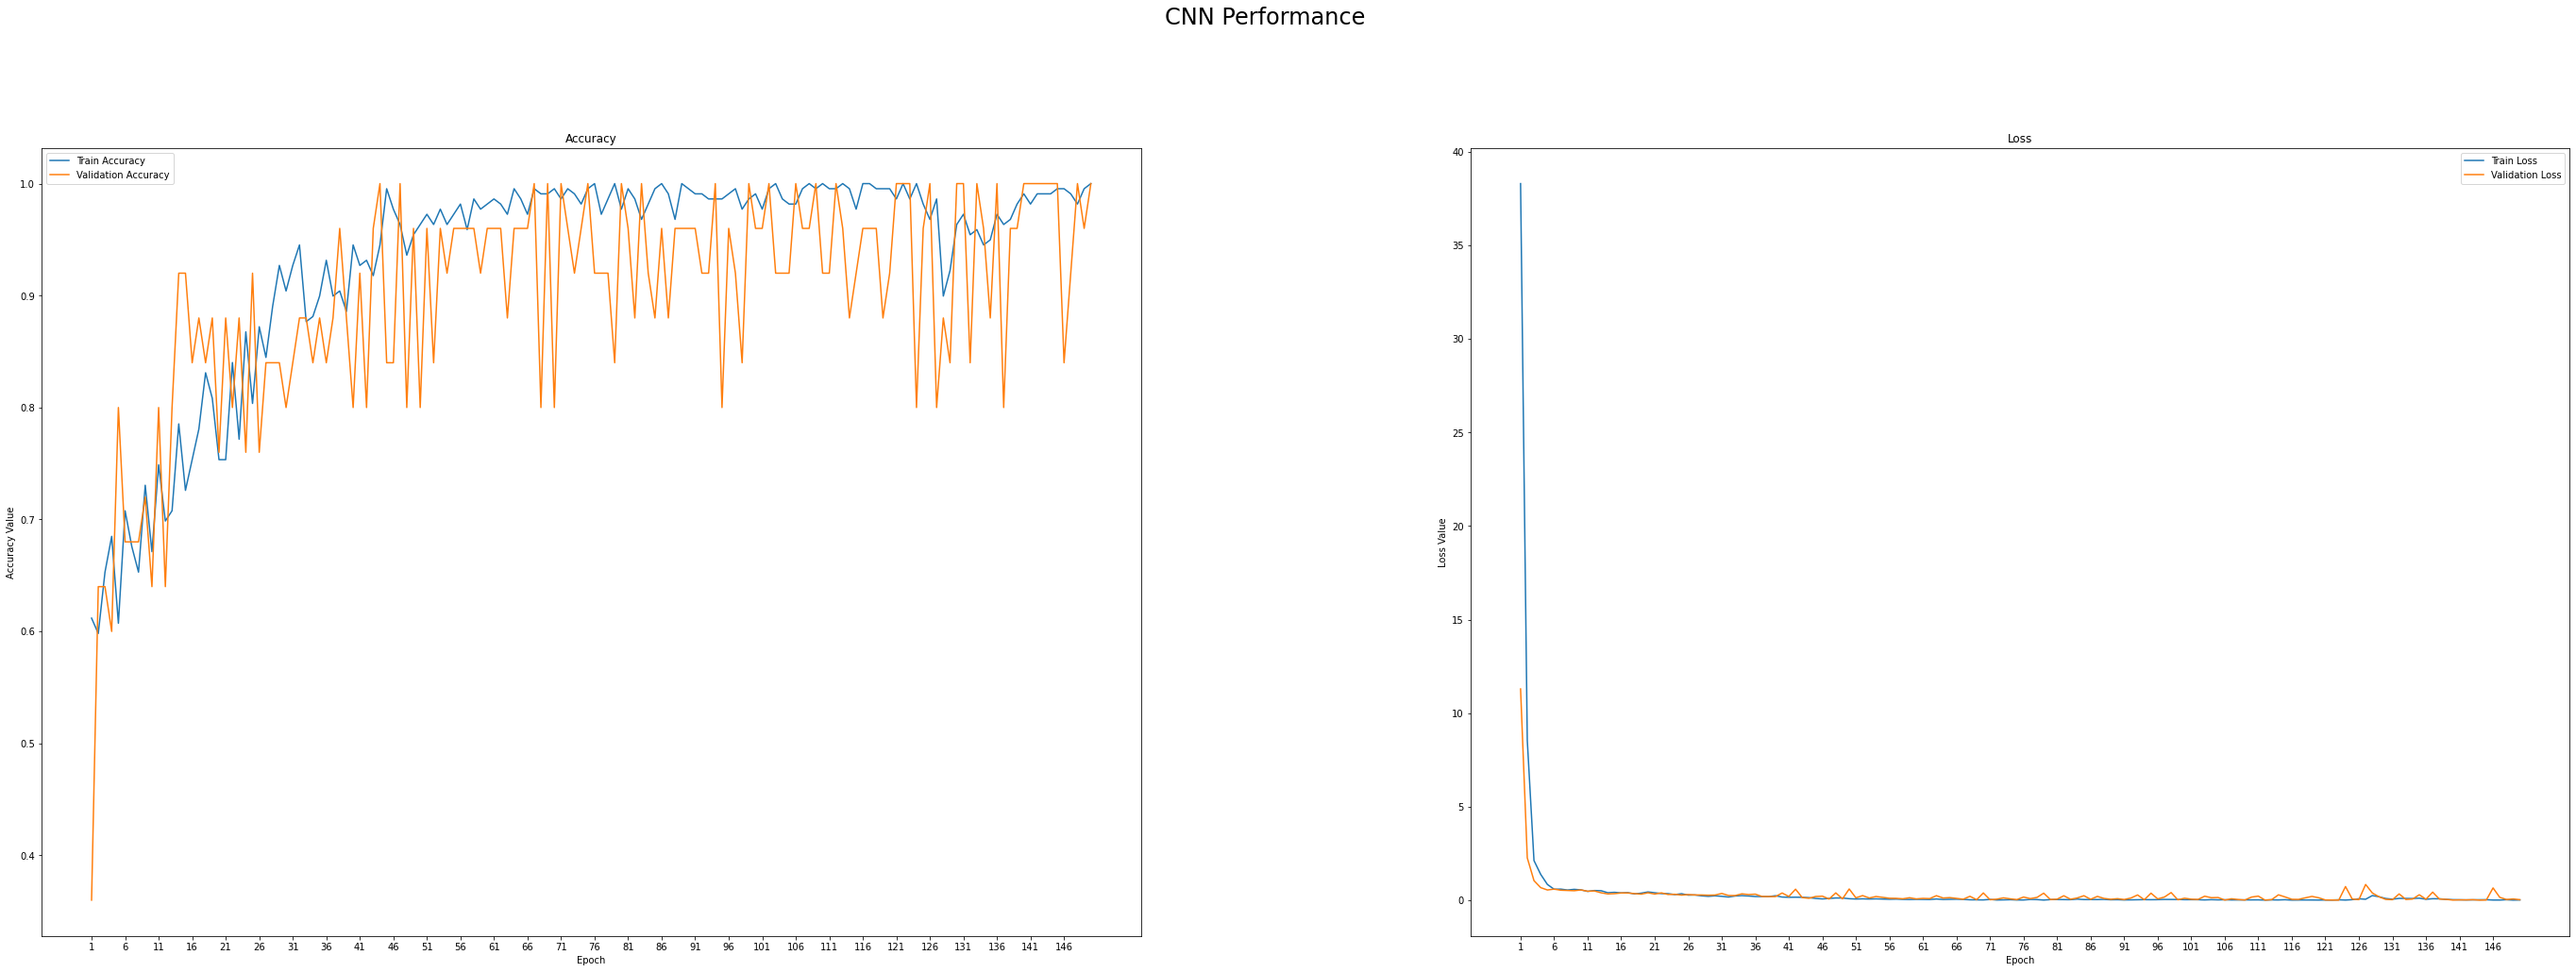

In [148]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(X_test, y_test)[1]*100))




f, (ax1, ax2) = plt.subplots(1, 2, figsize=(48, 16))
t = f.suptitle('CNN Performance', fontsize=24)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


In [ ]:

# Acuracy score looks good but lets see if the model is actualy doing fone

[[18  0]
 [23  0]]


The prediction for this image is:  [[0.706981]]
The actual label for this image is:  1


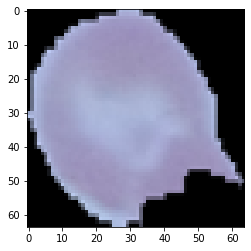

In [149]:
n=24  #Select the index of image to be loaded for testing
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])


The prediction for this image is:  [[2.7364229e-05]]
The actual label for this image is:  0


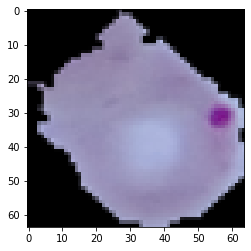

In [151]:
n=5  #Select the index of image to be loaded for testing
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])


The prediction for this image is:  [[1.0447347e-21]]
The actual label for this image is:  0


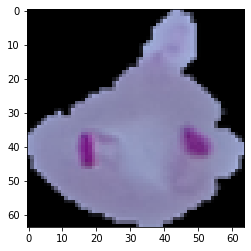

In [152]:
n=3  #Select the index of image to be loaded for testing
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])


In [ ]:
#looks good so far

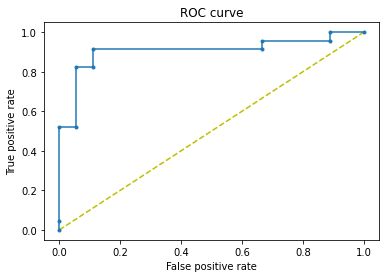

In [111]:
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [121]:
# 0 is parazitized
# 1 is uninfexted

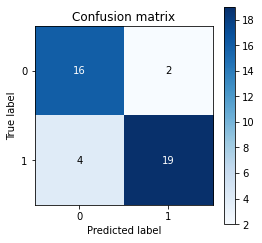

In [124]:
import scikitplot as skplt
mythreshold=0.5
y_pred = (model.predict(X_test)>= mythreshold).astype(int)
skplt.metrics.plot_confusion_matrix(
        y_test,
        y_pred,
        figsize=(4, 4),title="Confusion matrix")


plt.show()

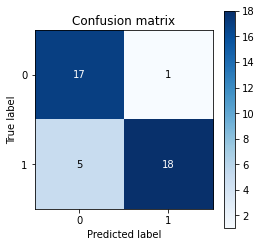

In [130]:
import scikitplot as skplt
mythreshold=0.8
y_pred = (model.predict(X_test)>= mythreshold).astype(int)
skplt.metrics.plot_confusion_matrix(
        y_test,
        y_pred,
        figsize=(4, 4),title="Confusion matrix")



In [126]:
## it is more important to be right about parasitized so the treshold should be 0.8